# Ejercicio 3

### Cargo la Red y la Dibujo, OJO NO CORRER TARDA MUCHO DIBUJARLA!!

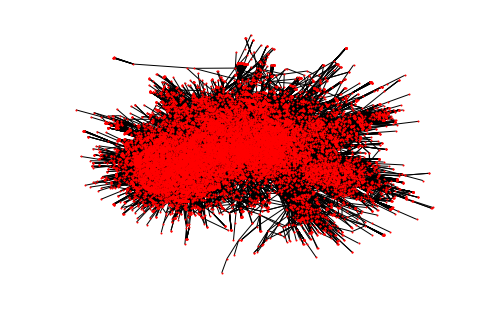

In [34]:
# Cargamos los archivos de datos sobre la red de internet
import matplotlib.pylab as plt
import networkx as nx
import numpy as np
import pandas as pd

G = nx.read_gml('as-22july06.gml')

#G = nx.Graph()
#G.add_edges_from(G)
nx.draw(G, node_size=1)
plt.show()

### Cargo la red y librerías (para no correr el de arriba que tarda) 

In [1]:
# Cargamos los archivos de datos sobre la red de internet
import matplotlib.pylab as plt
import networkx as nx
import numpy as np
import pandas as pd

G = nx.read_gml('as-22july06.gml')

### Armo la tira de grados de los nodos para hacer el histograma

In [2]:
grados_G = [gra for (nom,gra) in G.degree()] # [lo_que_quiero  for los_elementos in iterable]
Datos = np.asarray(grados_G)

#hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, 
# histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, 
# label=None, stacked=False, normed=None, hold=None, data=None, **kwargs)

### Grafico histogramas con bin lineal en escalas lin-lin, lin-log, log-lin y log-log

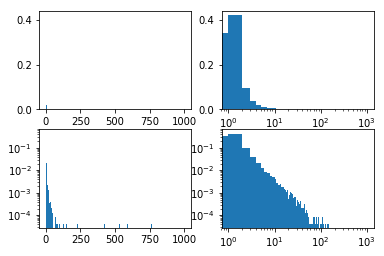

2390


In [3]:
#b='auto'
b=np.linspace(0,1000,1000)
plt.title("Linear Bins")
plt.subplot(221)
plt.hist(Datos, bins=b, density=True)
plt.subplot(222)
plt.hist(Datos, bins=b, density=True)
plt.xscale('log')
plt.subplot(223)
plt.hist(Datos, bins=b, density=True, log=True) 
#plt.yscale('log')
plt.subplot(224)
plt.hist(Datos, bins=b, density=True, log=True) 
plt.xscale('log')
#plt.yscale('log')
plt.show()
print(np.max(Datos))

### Grafico histogramas con bin log en escalas lin-lin, lin-log, log-lin y log-log

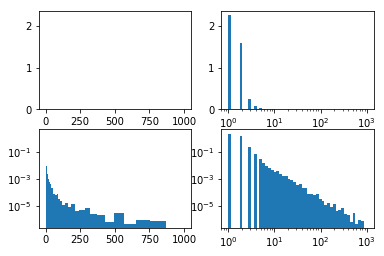

In [4]:
b=np.logspace(0,3,50)
plt.title("Linear Bins")
plt.subplot(221)
plt.hist(Datos, bins=b, density=True)
plt.subplot(222)
plt.hist(Datos, bins=b, density=True)
plt.xscale('log')
plt.subplot(223)
plt.hist(Datos, bins=b, density=True, log=True) 
#plt.yscale('log')
plt.subplot(224)
plt.hist(Datos, bins=b, density=True, log=True) 
plt.xscale('log')
#plt.yscale('log')
plt.show()

# La escala log-log con bineado log es la que mejor representa el carácter libre de escala de la red.

## Ajuste del Kmin y gamma, gamma=2.09>2 => Libre de Escala!

2.087156668877868
5.0


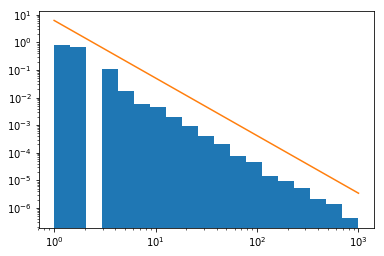

In [58]:
import igraph as ig
fit=ig.power_law_fit(Datos)
gamma=fit.alpha #Este es el exponente de la power law
Kmin=fit.xmin #Este el K_min
print(gamma)
print(Kmin)

b=np.logspace(0,3,20)
p=(gamma-1)/Kmin*(b/Kmin)**(-gamma)

plt.hist(Datos, bins=b, density=True, log=True) 
plt.xscale('log')
plt.plot(b,p)
plt.show()